<a href="https://colab.research.google.com/github/Bruna-gc/NeuralNetworksResearch/blob/main/InvertingMatrixes_ComparingCPU_GPU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import time as time
import matplotlib.pyplot as plt
from tabulate import tabulate
import statistics
import numpy as np

In [ ]:
# comparing GPU and CPU times inverting matrixes.

# Configuration
num_trials = 3
sizes = [i for i in range(20, 40, 2)] + [i for i in range(1000, 6000, 1000)]
print("Matrix sizes to test:", sizes)

# Check GPU availability
if torch.cuda.is_available():
    print("GPU available\n")
else:
    exit("GPU not available")

def test_speed(device_name, size, num_trials):
    """Test matrix inversion speed for given device and size"""
    times = []

    for trial in range(num_trials):
        # Create random matrix

        matrix = torch.rand(size, size, device=device_name)

        # Start timer
        start_time = time.time()

        i_matrix = torch.inverse(matrix)

        # Synchronize GPU operations
        if device_name == 'cuda':
            torch.cuda.synchronize()

        end_time = time.time()

        # Calculate time
        elapsed_time = end_time - start_time
        times.append(elapsed_time)

    return times

# Prepare data structures
cpu_data = []
gpu_data = []
trials_headers = ['Trial ' + str(i+1) for i in range(num_trials)]
headers = ["Device", "Size"] + trials_headers + ["Average", "Standard Deviation"]

print("Running performance tests...\n")

# Run tests for each matrix size
for size in sizes:
    print(f"Testing matrix size: {size}x{size}")

    # Test CPU
    cpu_times = test_speed('cpu', size, num_trials)
    cpu_avg = statistics.mean(cpu_times)
    cpu_std_dev = statistics.stdev(cpu_times)
    cpu_row = ["CPU", size] + [f"{time:.6f}" for time in cpu_times] + [f"{cpu_avg:.6f}", cpu_std_dev]
    cpu_data.append(cpu_row)

    # Test GPU
    gpu_times = test_speed('cuda', size, num_trials)
    gpu_avg = statistics.mean(gpu_times)
    gpu_std_dev = std_dev = statistics.stdev(gpu_times)
    gpu_row = ["GPU", size] + [f"{time:.6f}" for time in gpu_times] + [f"{gpu_avg:.6f}", gpu_std_dev]
    gpu_data.append(gpu_row)

    print(f"  CPU average: {cpu_avg:.6f}s")
    print(f"  GPU average: {gpu_avg:.6f}s")
    print(f"  Speedup: {cpu_avg/gpu_avg:.2f}x\n")

# Combined table
print("COMBINED RESULTS\n")
combined_data = []
for i in range(len(sizes)):
    combined_data.append(cpu_data[i])
    combined_data.append(gpu_data[i])

print(tabulate(combined_data, headers=headers, tablefmt="grid"))

# Collect data for plotting
plot_sizes = sizes
# getting the last value (average) for cpu and gpu
cpu_averages = [float(row[-1]) for row in cpu_data]
gpu_averages = [float(row[-1]) for row in gpu_data]



Matrix sizes to test: [20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 1000, 2000, 3000, 4000, 5000]
GPU available

Running performance tests...

Testing matrix size: 20x20
  CPU average: 0.000268s
  GPU average: 0.000673s
  Speedup: 0.40x

Testing matrix size: 22x22
  CPU average: 0.000087s
  GPU average: 0.000293s
  Speedup: 0.30x

Testing matrix size: 24x24
  CPU average: 0.000076s
  GPU average: 0.000279s
  Speedup: 0.27x

Testing matrix size: 26x26
  CPU average: 0.000086s
  GPU average: 0.000326s
  Speedup: 0.27x

Testing matrix size: 28x28
  CPU average: 0.000098s
  GPU average: 0.000306s
  Speedup: 0.32x

Testing matrix size: 30x30
  CPU average: 0.000079s
  GPU average: 0.000309s
  Speedup: 0.26x

Testing matrix size: 32x32
  CPU average: 0.000081s
  GPU average: 0.000357s
  Speedup: 0.23x

Testing matrix size: 34x34
  CPU average: 0.000094s
  GPU average: 0.000347s
  Speedup: 0.27x

Testing matrix size: 36x36
  CPU average: 0.000091s
  GPU average: 0.000357s
  Speedup: 0.25x

Testing

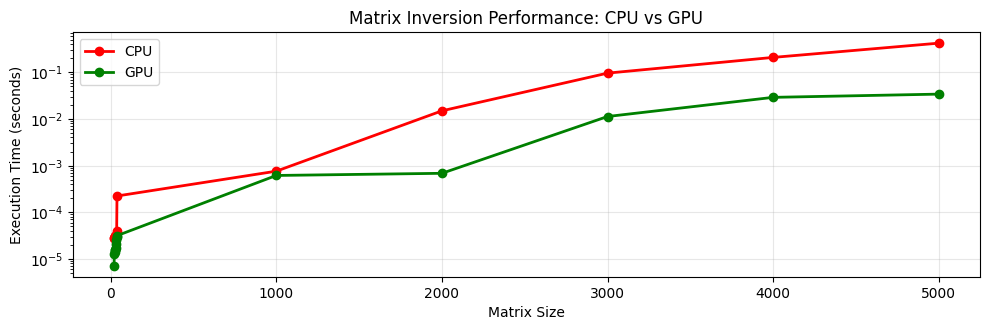


Performance Summary:
Average CPU time across all sizes: 0.049591s
Average GPU time across all sizes: 0.005059s


In [ ]:
# Plot results
plt.figure(figsize=(10, 6))

cpu_averages.sort()
gpu_averages.sort()

# Performance comparison plot
plt.subplot(2, 1, 1)
plt.plot(plot_sizes, cpu_averages, 'r-o', label='CPU', linewidth=2, markersize=6)
plt.plot(plot_sizes, gpu_averages, 'g-o', label='GPU', linewidth=2, markersize=6)
plt.xlabel('Matrix Size')
plt.ylabel('Execution Time (seconds)')
plt.title('Matrix Inversion Performance: CPU vs GPU')
plt.legend()
plt.grid(True, alpha=0.3)
plt.yscale('log')  # Log scale often better for performance comparisons

# Speedup plot
# plt.subplot(2, 1, 2)
# speedups = [cpu_avg/gpu_avg for cpu_avg, gpu_avg in zip(cpu_averages, gpu_averages)]
# plt.plot(plot_sizes, speedups, 'b-o', linewidth=2, markersize=6)
# plt.xlabel('Matrix Size')
# plt.ylabel('Speedup (CPU time / GPU time)')
# plt.title('GPU Speedup over CPU')
# plt.grid(True, alpha=0.3)
# plt.axhline(y=1, color='r', linestyle='--', alpha=0.5, label='No speedup')
# plt.legend()

plt.tight_layout()
plt.show()

print("\nPerformance Summary:")
print(f"Average CPU time across all sizes: {np.mean(cpu_averages):.6f}s")
print(f"Average GPU time across all sizes: {np.mean(gpu_averages):.6f}s")
# print(f"Average speedup: {np.mean(speedups):.2f}x")
